## predicting house prices based on featires with ANN and Deep neural Nework

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
data = pd.read_csv("resources/kc_house_data.csv")

In [70]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [71]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [72]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## evaluating the target

In [73]:
import seaborn as sns 

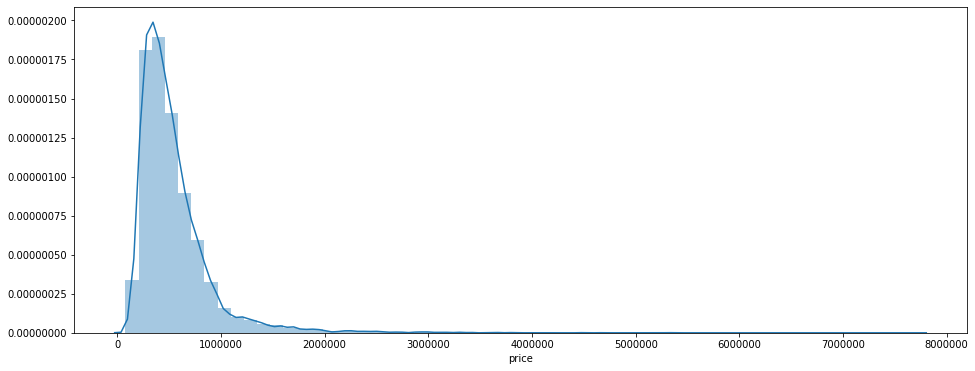

In [74]:
plt.figure(figsize=(16,6))
sns.distplot(data["price"], bins = 60)

## eveluating number of bedrooms

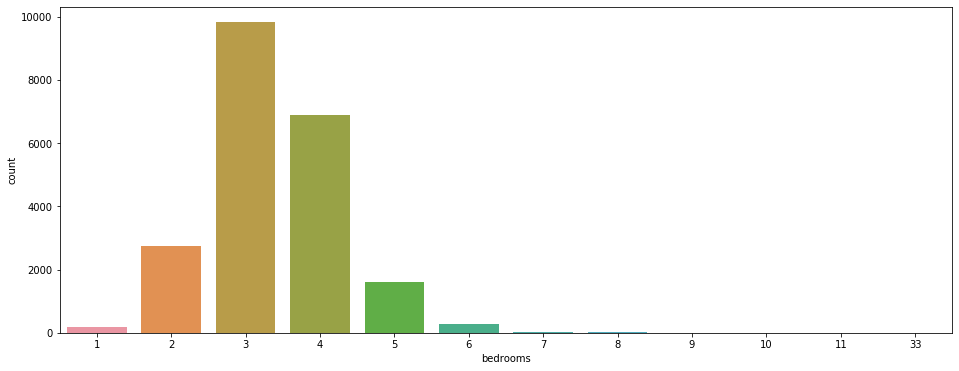

In [75]:
plt.figure(figsize=(16,6))
sns.countplot(x="bedrooms" , data= data)

### lets compare target correlation to all other data

In [76]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


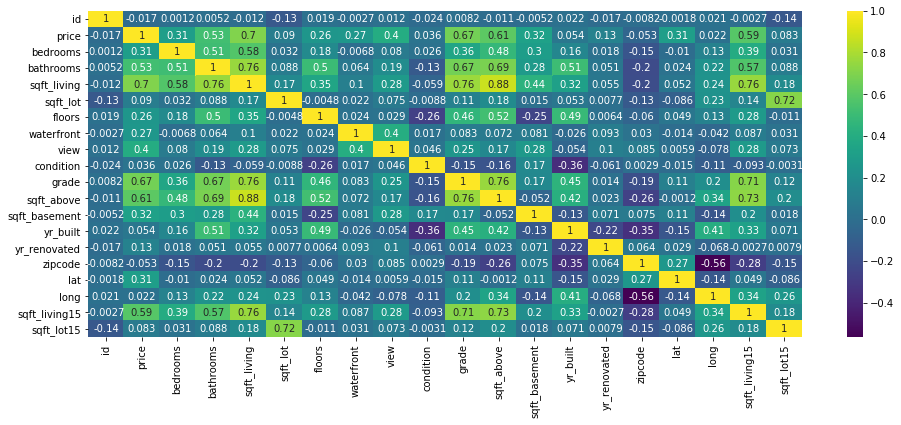

In [77]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(), cmap="viridis", annot=True)

### looks like the ios a strong correlation to the price and the sqft_living..Lets plot this below

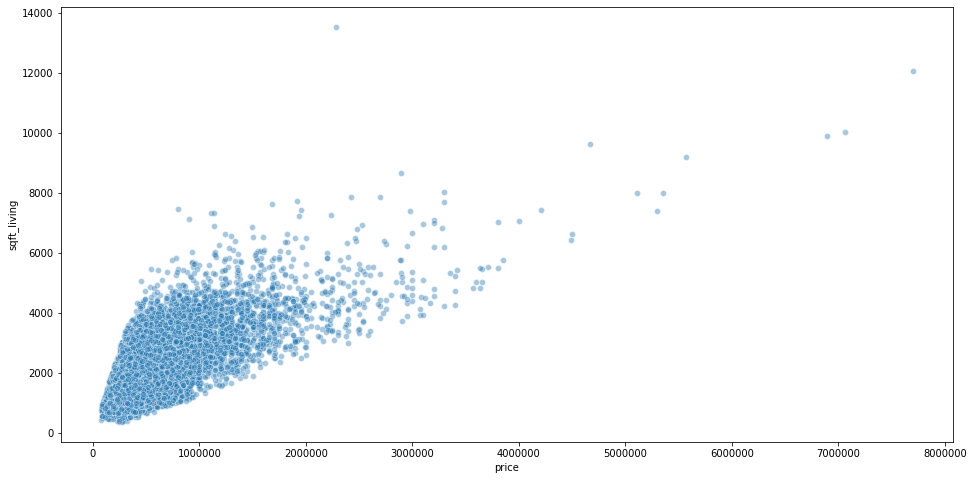

In [78]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = "price", y = "sqft_living", data=data, alpha=0.4)

## llok at the bedrooms

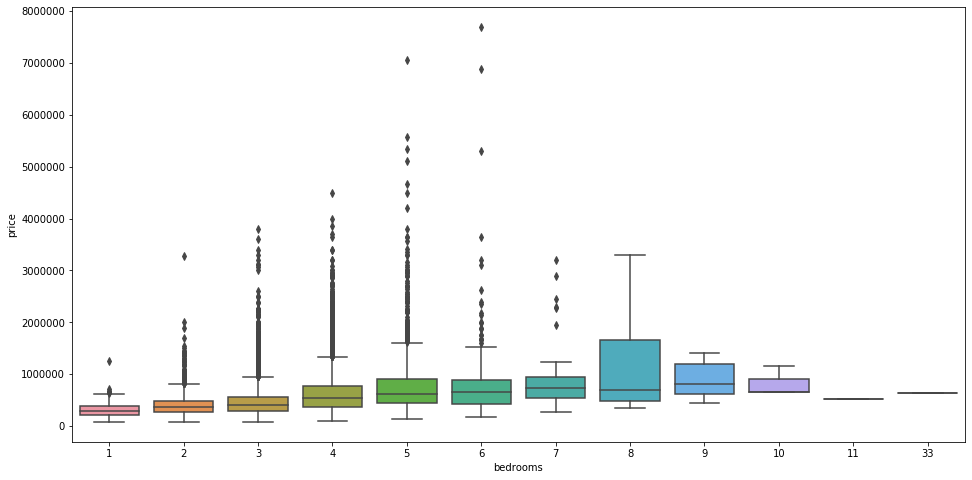

In [79]:
plt.figure(figsize=(16,8))
sns.boxplot(x = "bedrooms", y = "price", data=data)

## since we are not sing a geo library lets see if the matplotlib library can help us find where houses are mose expensice in the are we are observing


#### WE can see that prices are higher in the areas of a long of -122.2

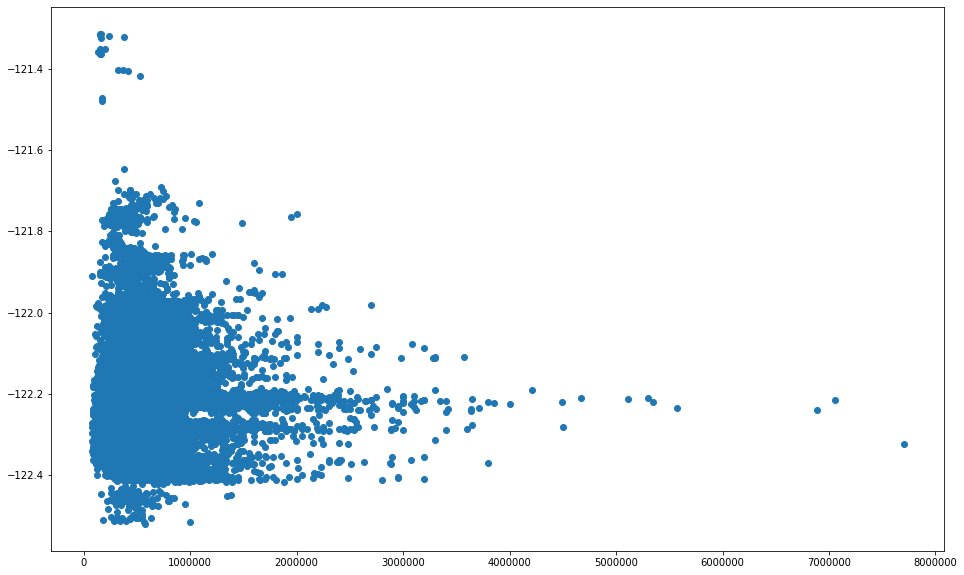

In [80]:
plt.figure(figsize=(16,10))
plt.scatter(x = "price", y = "long", data= data)

### lat -. higher prices around 47.6 and 47.7 

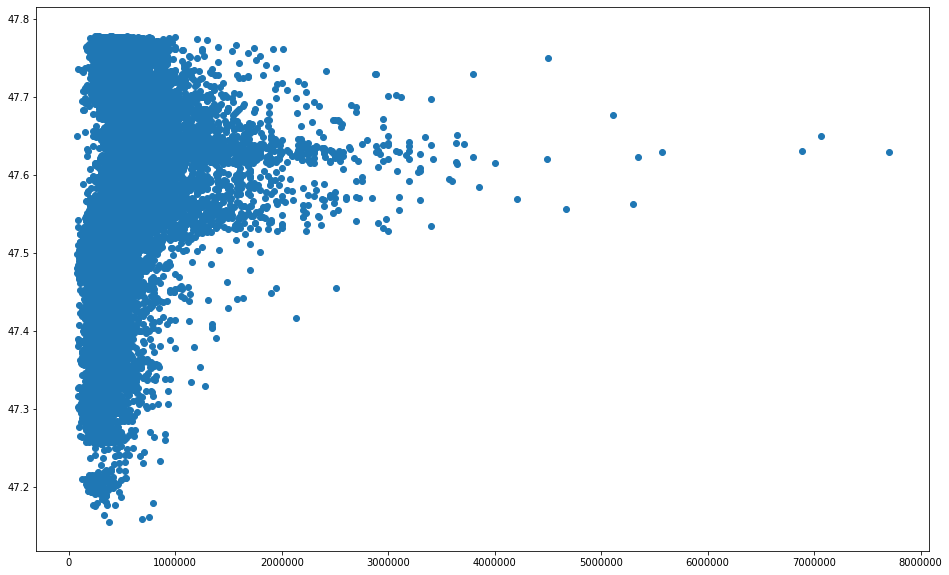

In [81]:
plt.figure(figsize=(16,10))
plt.scatter(x = "price", y = "lat", data= data)

## lets look at the total loong and lat -> this actually shoud draw a scatter map uing the data. We will need to remove the outlyers to get the proper hue but will assume that the most expensive homes are in that area  

In [82]:
data_no_outliers = data[data["price"] < 2000000]

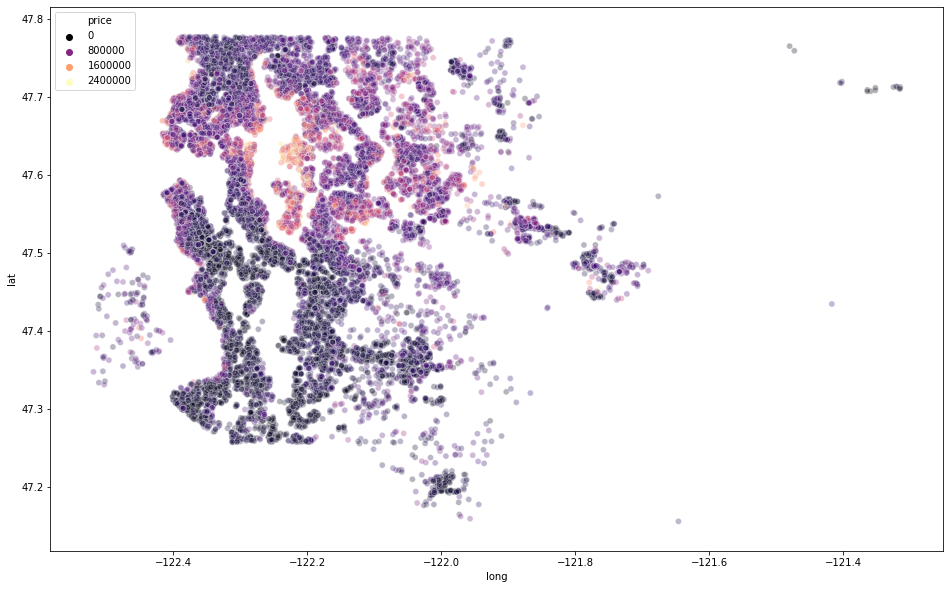

In [83]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = "long", y = "lat", data= data_no_outliers, hue="price", palette="magma", alpha=0.3)

## appears the more expensice homes are on the waterfront. Let plot this to see what homes are on the waterfront

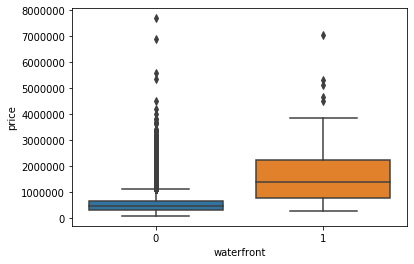

In [84]:
sns.boxplot(x = "waterfront", y = "price", data=data)

### Feature engineering - drop ID,

In [85]:
data = data.drop("id", axis=1)

In [86]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [87]:
data["date"] = pd.to_datetime(data["date"])

In [88]:
data["date"]

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [89]:
data["month"] = data["date"].apply(lambda x: x.month)
data["year"] = data["date"].apply(lambda x: x.year)

In [90]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2014
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2,2015
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,6,2014
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,1,2015


### lets look at the distribution of the prices per month to see if there are any price incrases per month. We dont get a major difference in the diatribution for each month. lets look at the numbers instead of the graph

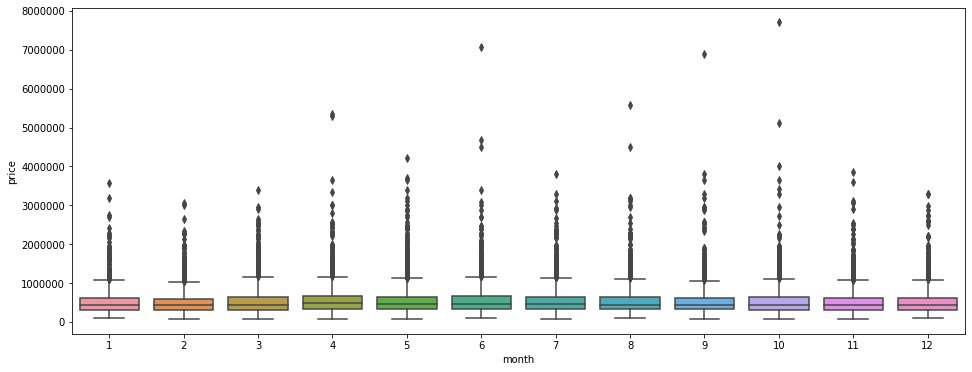

In [91]:
plt.figure(figsize=(16,6))
sns.boxplot(x = "month", y = "price", data = data)

In [92]:
 data.groupby("month").mean()["price"]

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

## looks like there is some patterns with months but seems like feb is a good month to buy a home

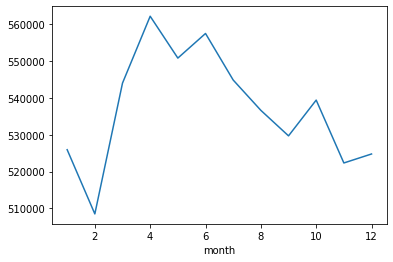

In [93]:
 data.groupby("month").mean()["price"].plot()

## since we have featured engineered the date getting the month and yeat we can remove the date column

In [94]:
data.drop("date", axis=1, inplace = True)

In [95]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2014
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2,2015
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,6,2014
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,1,2015


In [96]:
data.drop("zipcode", inplace=True, axis=1)

In [97]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,5,2014
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2,2015
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,6,2014
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,1,2015


#### Seperate features from label

In [98]:
X = data.drop("price", axis=1).values
y = data["price"].values

### Train test split

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Scaling -> we want to scale post splitting..that way we only fit to the training set to prevent data leakage form the test set

In [101]:
from sklearn.preprocessing import MinMaxScaler

### min max scalar scales based on the atandard deviation of the data. Scaling training and testing set

In [102]:
scalar = MinMaxScaler()

In [103]:
X_train = scalar.fit_transform(X_train)

In [104]:
X_test = scalar.transform(X_test)

### Creat the model. We will base the number of neurons based on the size of the feature data. So we will look the the number of columns in the training set - 19 

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [106]:
X_train.shape

(15117, 19)

## WE should have 19 neurons in out layer

In [107]:
model = Sequential()

model.add(Dense(units = 19, activation = "relu"))
model.add(Dense(units = 19, activation = "relu"))
model.add(Dense(units = 19, activation = "relu"))
model.add(Dense(units = 19, activation = "relu"))
model.add(Dense(units = 1))
model.compile(optimizer = "adam", loss = "mse")

## let train our model.. Validation data track as we go through each epoch and check againt the test set to see if we are overfitting..because this is a larger data set we will feed in data in batch -> common to do power of 2 velues.The smaller the batch size the longer trianing take but the less likely you will overfit. Large number of epochs -> so we can compare the taaining perfprmance to the test performance

In [108]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 2s 131us/sample - loss: 430240498874.6190 - val_loss: 418916685950.4198
Epoch 2/400
15117/15117 [==============================] - 1s 52us/sample - loss: 429002730099.3922 - val_loss: 414390463308.4839
Epoch 3/400
15117/15117 [==============================] - 1s 52us/sample - loss: 409745865110.0234 - val_loss: 369573199386.5482
Epoch 4/400
15117/15117 [==============================] - 1s 52us/sample - loss: 315894114160.8012 - val_loss: 223794510456.0988
Epoch 5/400
15117/15117 [==============================] - 1s 52us/sample - loss: 156525947744.2053 - val_loss: 102853415174.9531
Epoch 6/400
15117/15117 [==============================] - 1s 52us/sample - loss: 100408570156.4871 - val_loss: 94852908130.6074
Epoch 7/400
15117/15117 [==============================] - 1s 52us/sample - loss: 97027875343.2750 - val_loss: 92846591797.7284
Epoch 8/400
15117/15117 [==================

15117/15117 [==============================] - 1s 52us/sample - loss: 38891157212.1834 - val_loss: 37932706808.4148
Epoch 65/400
15117/15117 [==============================] - 1s 52us/sample - loss: 38606917014.2266 - val_loss: 37463980340.4642
Epoch 66/400
15117/15117 [==============================] - 1s 52us/sample - loss: 38377046224.9727 - val_loss: 37161355683.7136
Epoch 67/400
15117/15117 [==============================] - 1s 52us/sample - loss: 38058543299.2218 - val_loss: 36922620935.5852
Epoch 68/400
15117/15117 [==============================] - 1s 52us/sample - loss: 37782330033.8469 - val_loss: 36757148639.1309
Epoch 69/400
15117/15117 [==============================] - 1s 52us/sample - loss: 37560084072.4863 - val_loss: 36371395247.7235
Epoch 70/400
15117/15117 [==============================] - 1s 52us/sample - loss: 37348334311.4957 - val_loss: 36128998427.8123
Epoch 71/400
15117/15117 [==============================] - 1s 52us/sample - loss: 37186242704.5536 - val_loss

15117/15117 [==============================] - 1s 52us/sample - loss: 33190549249.4394 - val_loss: 31684175437.1161
Epoch 128/400
15117/15117 [==============================] - 1s 52us/sample - loss: 33157820170.6519 - val_loss: 31789864145.8568
Epoch 129/400
15117/15117 [==============================] - 1s 52us/sample - loss: 33131694717.1465 - val_loss: 31617917539.8716
Epoch 130/400
15117/15117 [==============================] - 1s 52us/sample - loss: 33145543727.4846 - val_loss: 31583219737.2840
Epoch 131/400
15117/15117 [==============================] - 1s 52us/sample - loss: 33064129648.5811 - val_loss: 31576317147.9704
Epoch 132/400
15117/15117 [==============================] - 1s 52us/sample - loss: 33077880826.3777 - val_loss: 31542245851.3383
Epoch 133/400
15117/15117 [==============================] - 1s 52us/sample - loss: 33060975425.7908 - val_loss: 31499178909.3926
Epoch 134/400
15117/15117 [==============================] - 1s 52us/sample - loss: 33005686447.9503 - v

15117/15117 [==============================] - 1s 52us/sample - loss: 31921925487.4803 - val_loss: 30016223550.5778
Epoch 191/400
15117/15117 [==============================] - 1s 52us/sample - loss: 31940162129.5231 - val_loss: 29993372012.0889
Epoch 192/400
15117/15117 [==============================] - 1s 52us/sample - loss: 31822052167.6841 - val_loss: 30051731218.3309
Epoch 193/400
15117/15117 [==============================] - 1s 52us/sample - loss: 31830018662.6574 - val_loss: 29907835764.9383
Epoch 194/400
15117/15117 [==============================] - 1s 52us/sample - loss: 31812908355.2811 - val_loss: 29954867174.7160
Epoch 195/400
15117/15117 [==============================] - 1s 52us/sample - loss: 31818057627.4425 - val_loss: 29875470083.1605
Epoch 196/400
15117/15117 [==============================] - 1s 52us/sample - loss: 31758242406.0478 - val_loss: 29935382826.3506
Epoch 197/400
15117/15117 [==============================] - 1s 52us/sample - loss: 31779305565.3603 - v

15117/15117 [==============================] - 1s 51us/sample - loss: 30865565294.8537 - val_loss: 28863692294.3210
Epoch 254/400
15117/15117 [==============================] - 1s 51us/sample - loss: 30956667164.7718 - val_loss: 28764954664.4543
Epoch 255/400
15117/15117 [==============================] - 1s 51us/sample - loss: 30809599277.7742 - val_loss: 28746003807.4469
Epoch 256/400
15117/15117 [==============================] - 1s 52us/sample - loss: 30823231135.9301 - val_loss: 28729349269.1753
Epoch 257/400
15117/15117 [==============================] - 1s 51us/sample - loss: 30802312125.9552 - val_loss: 28819671151.2494
Epoch 258/400
15117/15117 [==============================] - 1s 52us/sample - loss: 30789920353.1706 - val_loss: 28688639180.8000
Epoch 259/400
15117/15117 [==============================] - 1s 51us/sample - loss: 30772539748.9131 - val_loss: 28811487616.3160
Epoch 260/400
15117/15117 [==============================] - 1s 51us/sample - loss: 30747055253.2275 - v

15117/15117 [==============================] - 1s 51us/sample - loss: 29651292834.6735 - val_loss: 27374627043.5556
Epoch 317/400
15117/15117 [==============================] - 1s 51us/sample - loss: 29606974323.9172 - val_loss: 27341641277.9457
Epoch 318/400
15117/15117 [==============================] - 1s 51us/sample - loss: 29659105651.4769 - val_loss: 27356715144.5333
Epoch 319/400
15117/15117 [==============================] - 1s 51us/sample - loss: 29567277299.4515 - val_loss: 27272907667.2790
Epoch 320/400
15117/15117 [==============================] - 1s 51us/sample - loss: 29556974471.5613 - val_loss: 27325680895.3679
Epoch 321/400
15117/15117 [==============================] - 1s 51us/sample - loss: 29518247938.0322 - val_loss: 27319141110.5185
Epoch 322/400
15117/15117 [==============================] - 1s 51us/sample - loss: 29549483635.7309 - val_loss: 27191398860.1679
Epoch 323/400
15117/15117 [==============================] - 1s 51us/sample - loss: 29454827764.3998 - v

15117/15117 [==============================] - 1s 51us/sample - loss: 28349549384.0228 - val_loss: 25998275844.4247
Epoch 380/400
15117/15117 [==============================] - 1s 51us/sample - loss: 28259252952.7287 - val_loss: 25899773324.9580
Epoch 381/400
15117/15117 [==============================] - 1s 51us/sample - loss: 28275138485.2169 - val_loss: 25916645932.2469
Epoch 382/400
15117/15117 [==============================] - 1s 51us/sample - loss: 28289753966.1594 - val_loss: 25878017805.2741
Epoch 383/400
15117/15117 [==============================] - 1s 51us/sample - loss: 28240945976.4260 - val_loss: 26044674356.4642
Epoch 384/400
15117/15117 [==============================] - 1s 51us/sample - loss: 28263436390.5558 - val_loss: 25856703687.7432
Epoch 385/400
15117/15117 [==============================] - 1s 51us/sample - loss: 28125033549.1539 - val_loss: 26010970380.0099
Epoch 386/400
15117/15117 [==============================] - 1s 51us/sample - loss: 28194133401.0716 - v

## lets check how outr model performed. Explor on the evaluation on the training data. Explor what the model history looks like. since ewe used the test set we can get the model loss for the validation data also. We will compare the loos on the train set as well as the validation set to see if we are overfitting the data for out model

In [109]:
pdd = pd.DataFrame(model.history.history)

In [110]:
pdd

,loss,val_loss
0,4.302405e+11,4.189167e+11
1,4.290027e+11,4.143905e+11
2,4.097459e+11,3.695732e+11
3,3.158941e+11,2.237945e+11
4,1.565259e+11,1.028534e+11
...,...,...
395,2.795884e+10,2.560258e+10
396,2.785825e+10,2.558239e+10
397,2.783442e+10,2.555824e+10
398,2.786323e+10,2.563033e+10


### inspecting losses. This is what we want to see, where the loss for the training data and th evalidation loss...Decreae in traiing and validtion. IF there is no increase in val set we can assume we can keep training without overfitting..If the orange line began to spike that means we are overfitting to training data. (early stoping process my be needed)

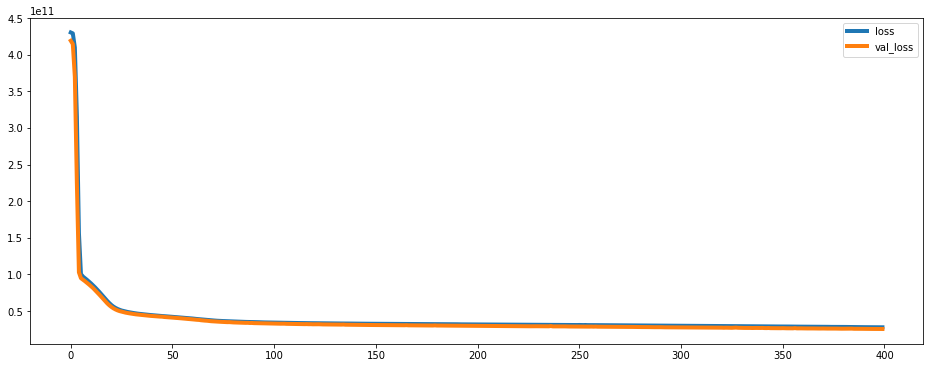

In [111]:
pdd.plot(figsize = (16,6), lw = 4)

## lets evaluation the  test data 

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [113]:
predict = model.predict(X_test)

In [114]:
mean_absolute_error(y_test, predict)

97712.73753014082

In [115]:
mean_squared_error(y_test, predict)

25530553078.58066

In [116]:
import numpy as np

In [117]:
np.sqrt(mean_squared_error(y_test,predict))

159782.83098812794

## Evaluation -> this is not that great based on our mean absolute error since we seem to be off by 20 percent of tge aerage prive of house in our data. lets take alook that the explained variance score also. This tells us how much variance is being explained by out model. 

In [118]:
explained_variance_score(y_test,predict)

0.8075276020872965

## lets plot out prediciton vs out true values. In a perfect world the redline is what we want. we are being punished by th e outliers.  Seems tht we have some predicitons for houses under 2M dollars. we may need to retrain the model i nthe bottm layer

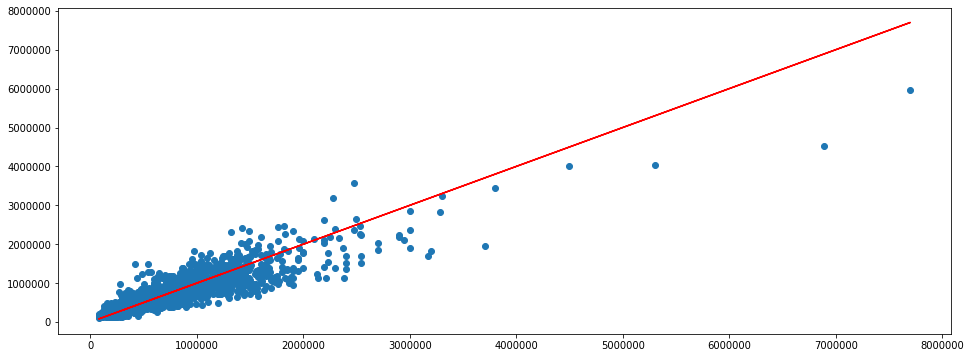

In [119]:
plt.figure(figsize=(16,6))
plt.scatter(y_test, predict)
plt.plot(y_test,y_test, c= "r")

### how would e predict on a brand new house. We will take one of the hoises form the data to predict what the price would be as if we did not know

In [133]:
single_house = data.drop("price", axis=1).iloc[0]

In [135]:
len(single_house.values)

19

## - 1 just means keep the old dimentions along the axis

In [134]:
single_house.values.reshape(-1,19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  1.00000e+01,  2.01400e+03]])

In [122]:
single_house = scalar.transform(single_house.values.reshape(-1,19))

##### True value below is 221900 and we predicted 292412. Looks like we are overshooting here so we may want  to go back an and retrain out data and remove the outliers

In [123]:
model.predict(single_house)

array([[306647.2]], dtype=float32)

In [124]:
data.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
